# Polynomial Regression

In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.

Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function E(y | x) is linear in the unknown parameters that are estimated from the data. For this reason, polynomial regression is considered to be a special case of multiple linear regression.

In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loan_df= pd.read_csv('loan_analysis_summary.csv')

In [3]:
loan_df.head()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
0,500,3585,3183,19.737013,13660.71827,55000,63396.10292,15.352285,2.463470,0.520266
1,510,8223,7191,19.747810,13889.67226,56000,65446.52263,15.440212,5.565445,1.175378
2,520,9792,8370,20.085761,14186.13920,58728,68261.38708,15.312451,6.477927,1.368087
3,530,10984,9254,20.253199,14487.00838,60000,69041.52340,15.449011,7.162095,1.512578
4,540,12333,10127,20.770446,14756.36706,60000,69948.95243,15.271022,7.837750,1.655271


In [4]:
loan_df[['fico_score','loan_total']].corr('spearman')

,fico_score,loan_total
fico_score,1.000000,0.043243
loan_total,0.043243,1.000000


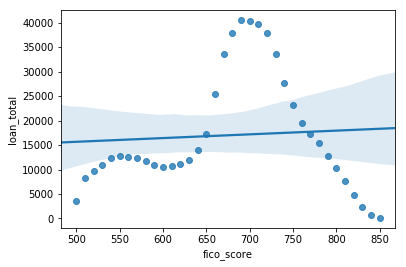

In [5]:
sns.regplot(x='fico_score', y='loan_total', data=loan_df)

In [6]:
coef5= np.poly1d(np.polyfit(loan_df['fico_score'], loan_df['loan_total'],5))

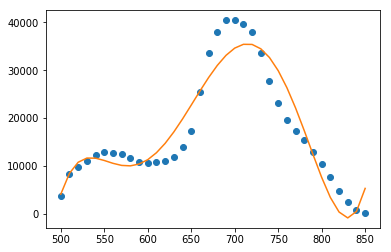

In [7]:
xp = loan_df['fico_score']
plt.plot(loan_df['fico_score'], loan_df['loan_total'],'o', xp, coef5(xp), '-')
plt.show()

In [8]:
loan_df[['dti','loan_total']].corr('spearman')

,dti,loan_total
dti,1.000000,0.029344
loan_total,0.029344,1.000000


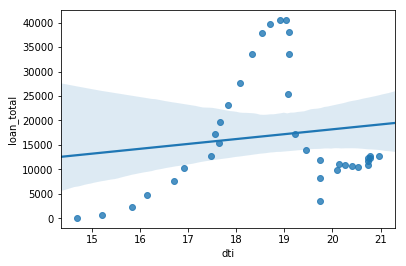

In [9]:
sns.regplot(x='dti', y='loan_total', data=loan_df)

In [10]:
polynomial_features= PolynomialFeatures(degree=4)

In [11]:
poly_x= polynomial_features.fit_transform(loan_df[['dti']])
model= LinearRegression()
model.fit(poly_x, loan_df['loan_total'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
pred= model.predict(poly_x)

In [13]:
rmse = np.sqrt(mean_squared_error(loan_df['loan_total'], pred))
r2 = r2_score(loan_df['loan_total'], pred)

print("RMSE of polynomial regression is:", rmse)
print("R2 of polynomial regression is:", r2)

RMSE of polynomial regression is: 7019.784163972939
R2 of polynomial regression is: 0.6431437975139174


In [14]:
model.coef_

array([ 0.00000000e+00, -1.33678762e+07,  1.11964965e+06, -4.13729904e+04,
        5.69311839e+02])

In [15]:
model.intercept_

59406562.59501092

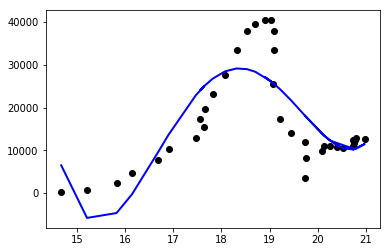

In [16]:
plt.scatter(loan_df['dti'], loan_df['loan_total'], color='black')
plt.plot(loan_df['dti'], pred, color='blue', linewidth=2)

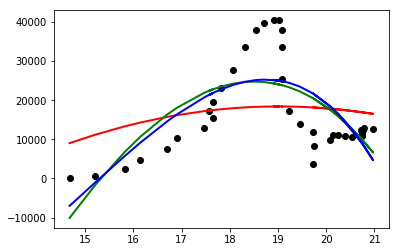

In [17]:
plt.scatter(loan_df['dti'], loan_df['loan_total'], color='black')
colors= ['red', 'green', 'blue']
lw=2

for count, degree in enumerate([2,3,4]):
    model= make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(loan_df[['dti']], loan_df['loan_total'])
    y_pred= model.predict(loan_df[['dti']])
    plt.plot(loan_df['dti'], y_pred, color=colors[count], linewidth=lw)